### Introdução sobre o Projeto

##### Etapa 1. Pré-Processamento dos Dados

In [25]:
#importando bibliotecas

import pandas as pd 
import numpy as np
import seaborn as sns 

import matplotlib.pyplot as plt

from scipy.stats import zscore


In [26]:
#evitar avisos do seaborn

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
#lendo o arquivo excel

df_1 = pd.read_excel(r'C:\Users\cesar\Downloads\ifoodtech_moduloV\projeto\Clean_Ads_Data.xlsx')

In [28]:
#visualizando as três primeiras linhas

df_1.head(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2014-09-01-23,2014-09-01,23,Monday,Format1,300x250,Inter228,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0
1,2014-09-01-18,2014-09-01,18,Monday,Format7,300x600,Inter218,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0
2,2014-09-01-17,2014-09-01,17,Monday,Format7,300x600,Inter222,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0


In [29]:
#visualizando as três últimas linhas

df_1.tail(3)

,Timestamp,Date,Hour of Day,Date.1,InventoryType,AD Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25855,2014-11-24-03,2014-11-24,3,Monday,Format2,728x90,Inter229,Video,Desktop,Display,2671605,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25856,2014-11-24-05,2014-11-24,5,Monday,Format2,728x90,Inter225,Video,Mobile,Display,2454545,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042
25857,2014-11-24-04,2014-11-24,4,Monday,Format2,728x90,Inter220,Web,Mobile,Video,2219556,1224363,1142647,1229,2036.80,0.35,1323.9200,0.001076,1.782528,1.657282


In [30]:
#visualizando as principais info do dataframe

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25858 entries, 0 to 25857
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              25858 non-null  object        
 1   Date                   25858 non-null  datetime64[ns]
 2   Hour of Day            25858 non-null  int64         
 3   Date.1                 25858 non-null  object        
 4   InventoryType          25858 non-null  object        
 5   AD Size                25857 non-null  object        
 6   Ad Type                25858 non-null  object        
 7   Platform               25858 non-null  object        
 8   Device Type            25858 non-null  object        
 9   Format                 25858 non-null  object        
 10  Available_Impressions  25858 non-null  int64         
 11  Matched_Queries        25858 non-null  int64         
 12  Impressions            25858 non-null  int64         
 13  C

In [31]:
#excluindo as colunas: Timestamp, InventoryType, Ad Type.

df_1.drop(["Timestamp", "InventoryType", "Ad Type"], axis=1, inplace=True)

In [32]:
#selecionando dados qualitativo

df_1_qualitative = df_1.iloc[:,2:7]

df_1_qualitative

,Date.1,AD Size,Platform,Device Type,Format
0,Monday,300x250,Video,Mobile,Video
1,Monday,300x600,App,Mobile,Display
2,Monday,300x600,Video,Desktop,Display
3,Monday,300x250,App,Mobile,Display
4,Monday,300x250,Video,Desktop,Display
...,...,...,...,...,...
25853,Monday,728x90,App,Mobile,Display
25854,Monday,728x90,Web,Mobile,Display
25855,Monday,728x90,Video,Desktop,Display
25856,Monday,728x90,Video,Mobile,Display


In [33]:
# selecionando dados quantativo

df_1_quantitative = df_1.iloc[:,8:]

df_1_quantitative

,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,336,334,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
1,325,324,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
2,434,428,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
3,345,342,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
4,356,355,1,0.00,0.35,0.0000,0.002817,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
25853,2197060,2073627,2501,3822.17,0.33,2560.8539,0.001206,1.843229,1.528257
25854,2506395,2371296,3370,5150.49,0.30,3605.3430,0.001421,2.172015,1.528335
25855,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25856,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042


In [34]:
#principais estatísticas do dataframe - qualitativo

df_1_qualitative.describe()

,Date.1,AD Size,Platform,Device Type,Format
count,25858,25857,25858,25858,25858
unique,7,7,3,2,2
top,Monday,120x600,Video,Mobile,Video
freq,3733,7218,11077,16621,12929


In [35]:
#principais estatísticas do dataframe - quantitativo

df_1_quantitative.describe()

,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,2.585800e+04,2.585800e+04,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000,25858.000000
mean,1.155718e+06,1.107910e+06,9526.391252,2415.146152,0.336725,1717.072689,0.075019,7.524461,0.300359
std,2.408041e+06,2.327426e+06,16721.563722,3934.248083,0.030546,2994.152333,0.091288,8.928088,0.338831
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,5.451500e+03,2.559000e+03,305.000000,36.030000,0.350000,23.419500,0.002343,1.573372,0.078004
50%,1.895120e+05,1.621955e+05,3457.000000,1173.745000,0.350000,762.934250,0.007177,2.959644,0.118332
75%,1.008255e+06,9.499750e+05,10685.500000,2692.745000,0.350000,1750.284250,0.130617,12.448876,0.499956
max,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.177300,2.000000,715.000000,7.264000


In [36]:
#função para visualizar os valores únicos e nulos por colunas

def valores_unicos(df):
    for coluna in df.columns:
        print(f'Coluna {coluna}:')
        
        contar_valores = df[coluna].value_counts()
        porcentagem_valores = df[coluna].value_counts(normalize=True) * 100
        resultado_valores = pd.concat([contar_valores, porcentagem_valores], axis=1, 
                                     keys=['Qnt', 'Porcentagem']).round(2)
        print(resultado_valores)

        print(f'Valores nulos: {df[coluna].isnull().sum()}')
        print('\n')

#visualizando os valores 
valores_unicos(df_1)

Coluna Date:
            Qnt  Porcentagem
Date                        
2014-10-19  312         1.21
2014-11-20  312         1.21
2014-11-19  312         1.21
2014-11-18  312         1.21
2014-11-17  312         1.21
...         ...          ...
2014-09-04  278         1.08
2014-09-03  278         1.08
2014-09-02  274         1.06
2014-11-24  247         0.96
2014-09-01   90         0.35

[85 rows x 2 columns]
Valores nulos: 0


Coluna Hour of Day:
              Qnt  Porcentagem
Hour of Day                   
17           1096         4.24
18           1094         4.23
16           1093         4.23
20           1086         4.20
12           1086         4.20
19           1086         4.20
14           1085         4.20
10           1085         4.20
0            1085         4.20
23           1084         4.19
9            1084         4.19
15           1084         4.19
21           1083         4.19
11           1083         4.19
22           1082         4.18
13           1081    

In [37]:
#removendo a única linha que possui valor nulo no data set

df_1 = df_1.dropna(subset=['AD Size'])

In [38]:
#verificando se há linhas duplicadas 

df_1.duplicated().sum()

0

In [39]:
#organizando dataframe após remover linhas

df_1.reset_index(inplace=True, drop=True)


In [40]:
#criando uma coluna para mês

df_1['Month'] = df_1['Date'].dt.month


#visualizando as três primeiras linhas 

df_1.head(3)

,Date,Hour of Day,Date.1,AD Size,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,300x250,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01,18,Monday,300x600,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01,17,Monday,300x600,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [41]:
#substituir espaços e pontos por _ nos nomes das colunas

df_1.columns = df_1.columns.str.replace(' ', '_').str.replace('.', '_' )

#visualizando as três primeiras linhas 

df_1.head(3)

,Date,Hour_of_Day,Date_1,AD_Size,Platform,Device_Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Month
0,2014-09-01,23,Monday,300x250,Video,Mobile,Video,1911,336,334,0,0.0,0.35,0.0,0.0,0.0,0.0,9
1,2014-09-01,18,Monday,300x600,App,Mobile,Display,1987,325,324,0,0.0,0.35,0.0,0.0,0.0,0.0,9
2,2014-09-01,17,Monday,300x600,Video,Desktop,Display,2375,434,428,0,0.0,0.35,0.0,0.0,0.0,0.0,9


In [42]:
# Atualizando dados qualitativo e quantitativos após alterar estrutura do dataframe.

df_1_qualitative = pd.concat([df_1.iloc[:,2:7], df_1.iloc[:,-1]], axis=1)
df_1_qualitative

,Date_1,AD_Size,Platform,Device_Type,Format,Month
0,Monday,300x250,Video,Mobile,Video,9
1,Monday,300x600,App,Mobile,Display,9
2,Monday,300x600,Video,Desktop,Display,9
3,Monday,300x250,App,Mobile,Display,9
4,Monday,300x250,Video,Desktop,Display,9
...,...,...,...,...,...,...
25852,Monday,728x90,App,Mobile,Display,11
25853,Monday,728x90,Web,Mobile,Display,11
25854,Monday,728x90,Video,Desktop,Display,11
25855,Monday,728x90,Video,Mobile,Display,11


In [43]:
df_1_quantitative = df_1.iloc[:,8:-1]
df_1_quantitative

,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,336,334,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
1,325,324,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
2,434,428,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
3,345,342,0,0.00,0.35,0.0000,0.000000,0.000000,0.000000
4,356,355,1,0.00,0.35,0.0000,0.002817,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
25852,2197060,2073627,2501,3822.17,0.33,2560.8539,0.001206,1.843229,1.528257
25853,2506395,2371296,3370,5150.49,0.30,3605.3430,0.001421,2.172015,1.528335
25854,1518045,1419950,1498,2452.10,0.35,1593.8650,0.001055,1.726892,1.636916
25855,1395398,1311065,1564,2582.23,0.35,1678.4495,0.001193,1.969567,1.651042


##### 2. Identificação e Tratamento de Outliers

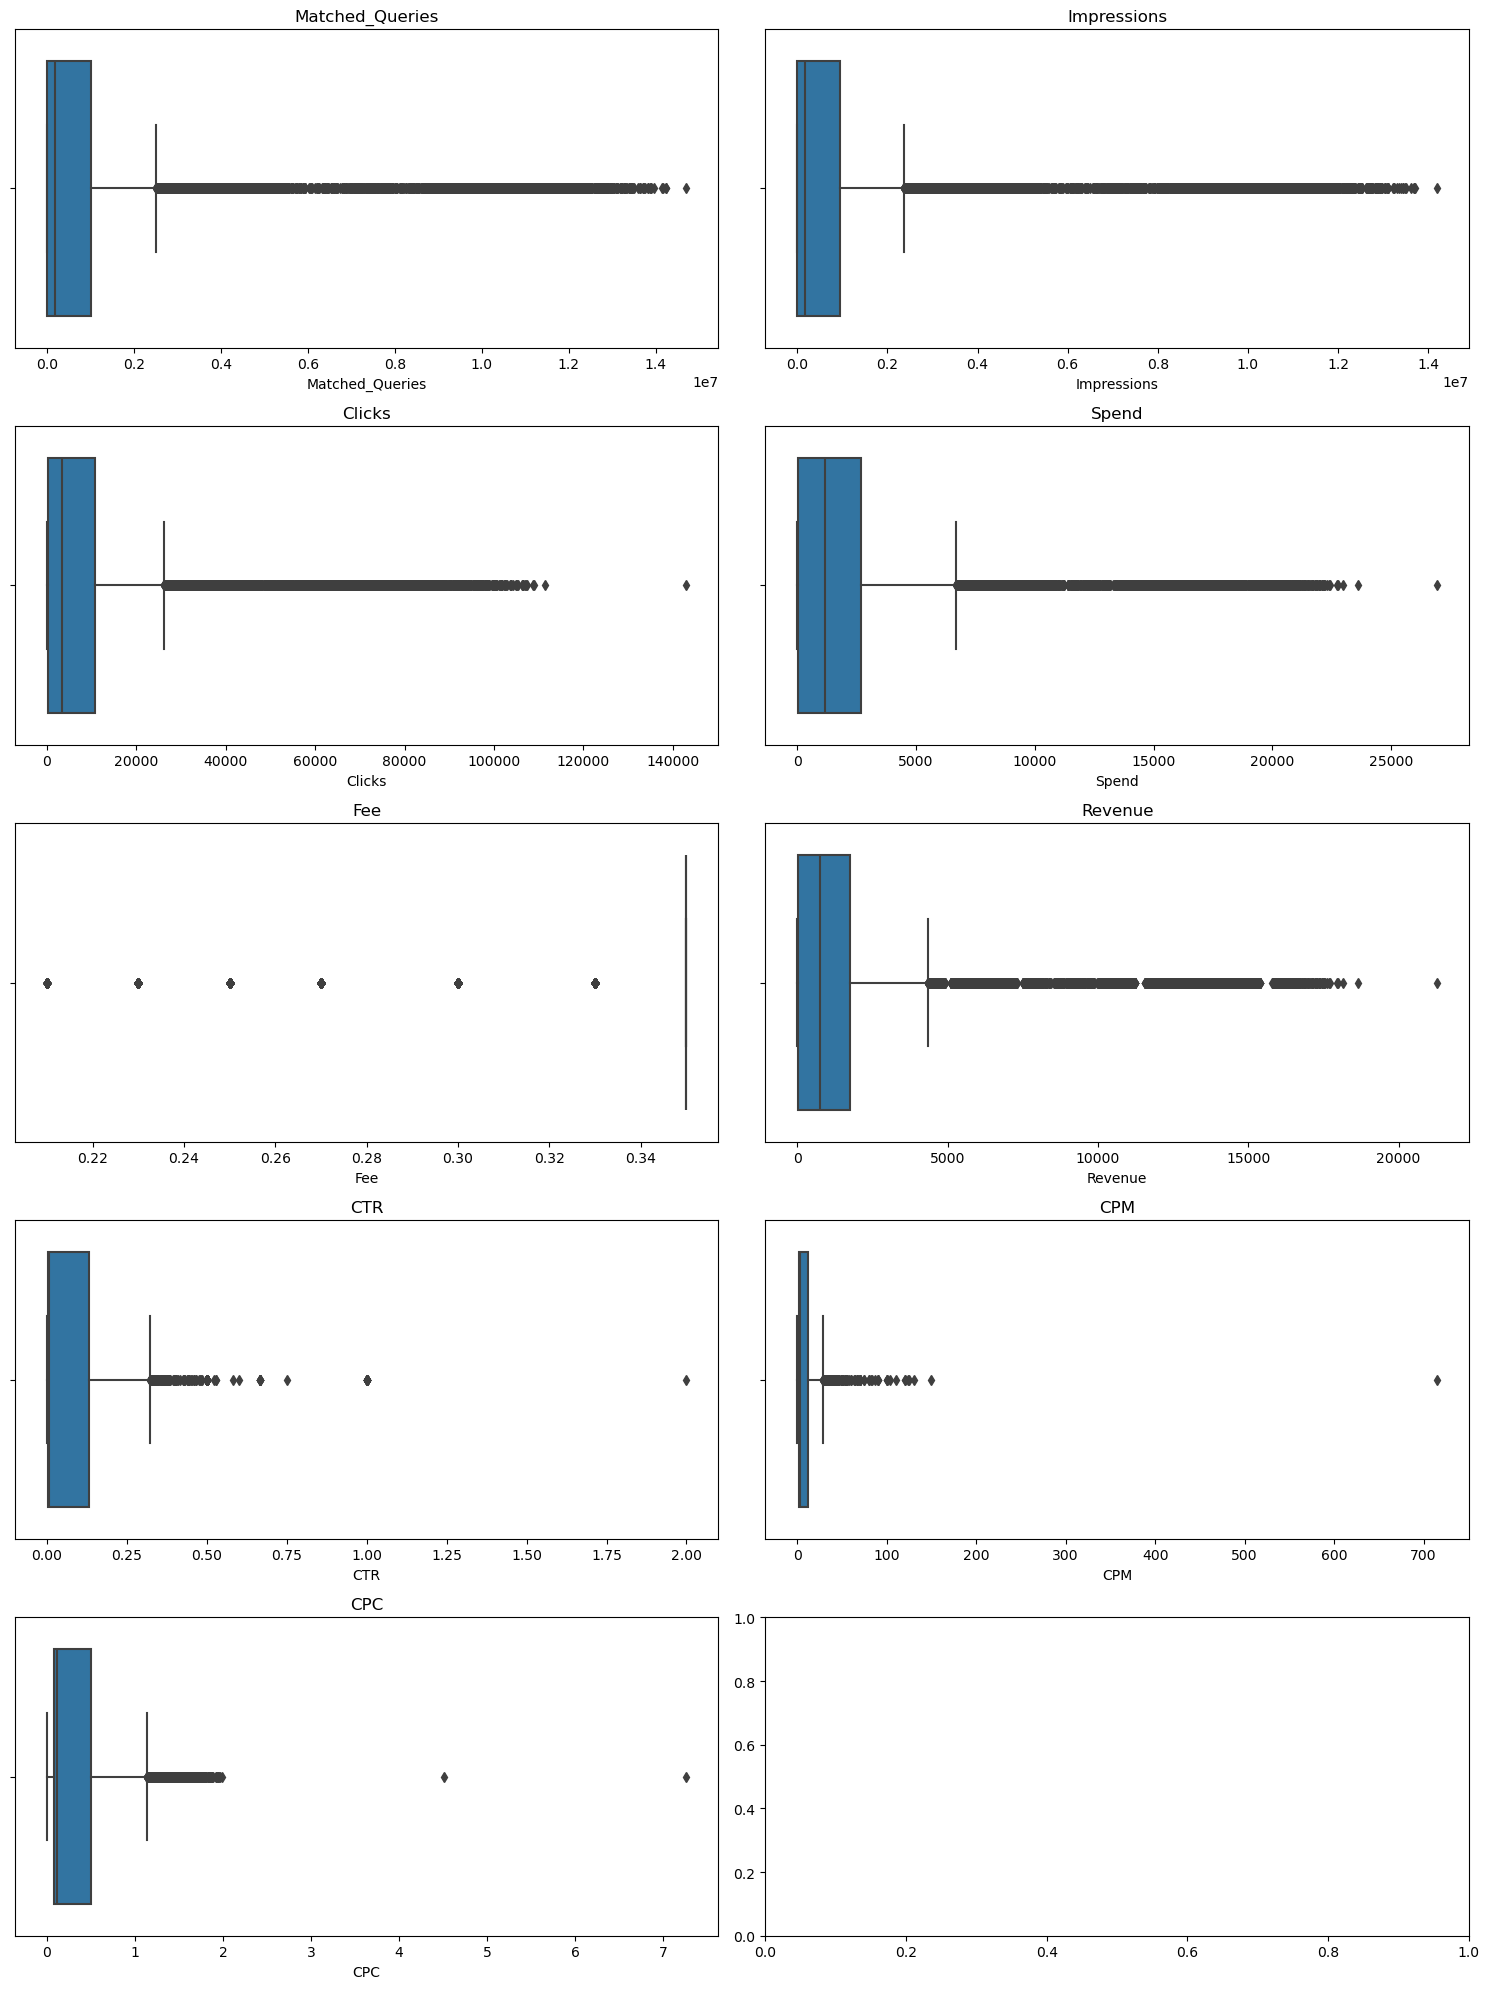

In [44]:
#visualizando distribuição das variáveis quantitativas - boxplot

colunas_numericas = df_1_quantitative.columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.boxplot(x=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()

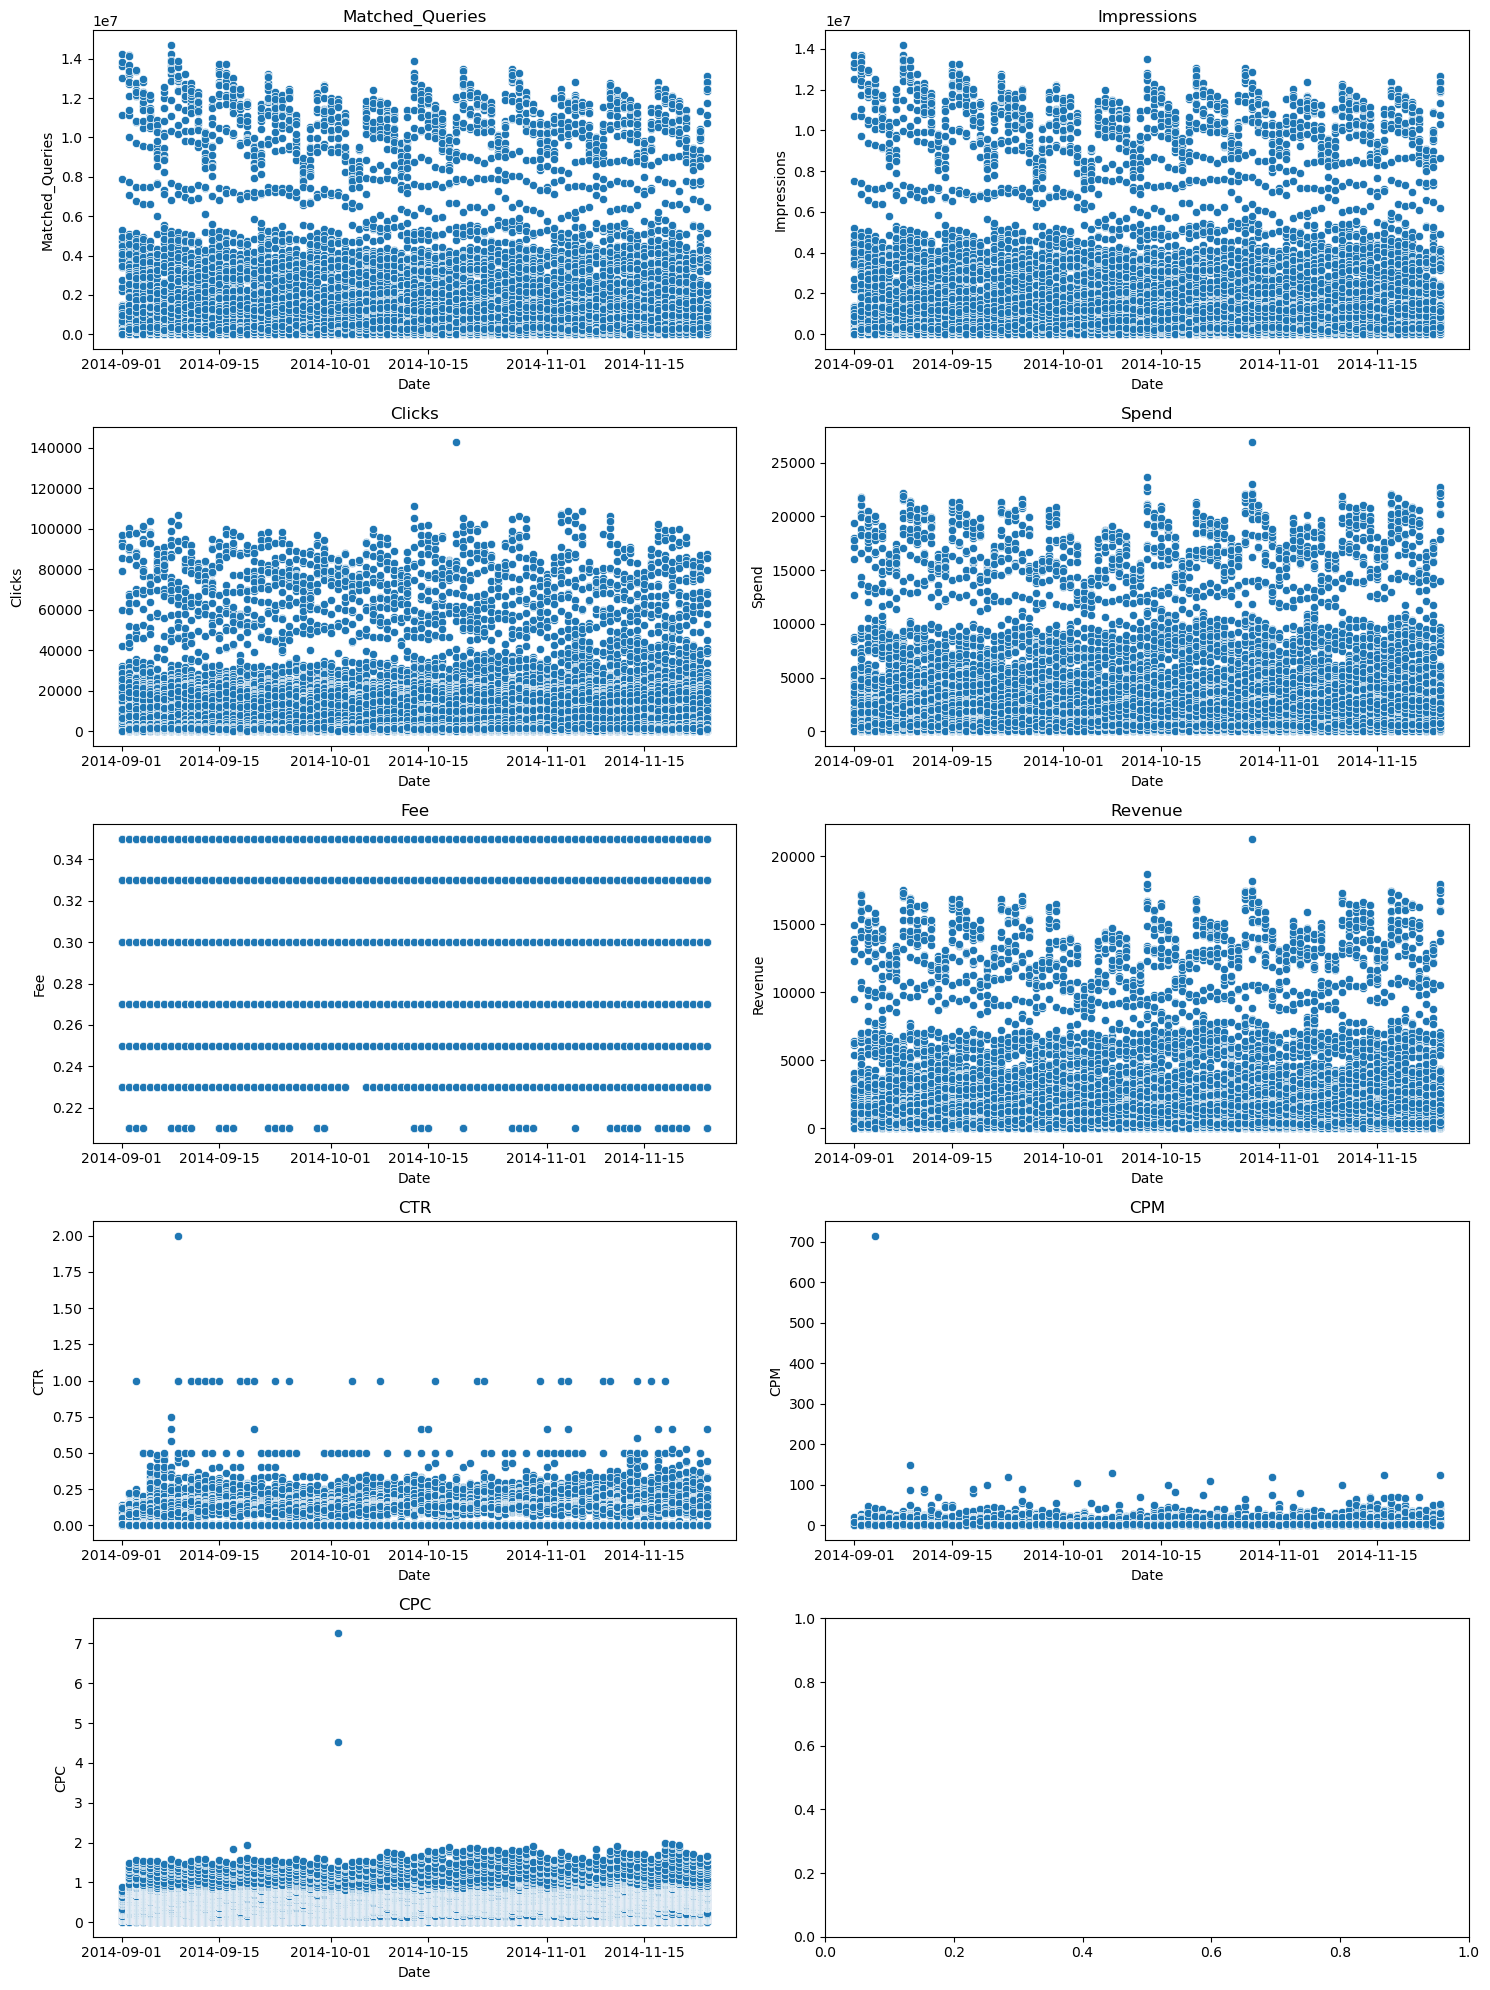

In [45]:
#visualizando distribuição das variáveis quantitativas - Scatter plot

colunas_numericas = df_1_quantitative.columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.scatterplot(x= df_1["Date"], y=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()

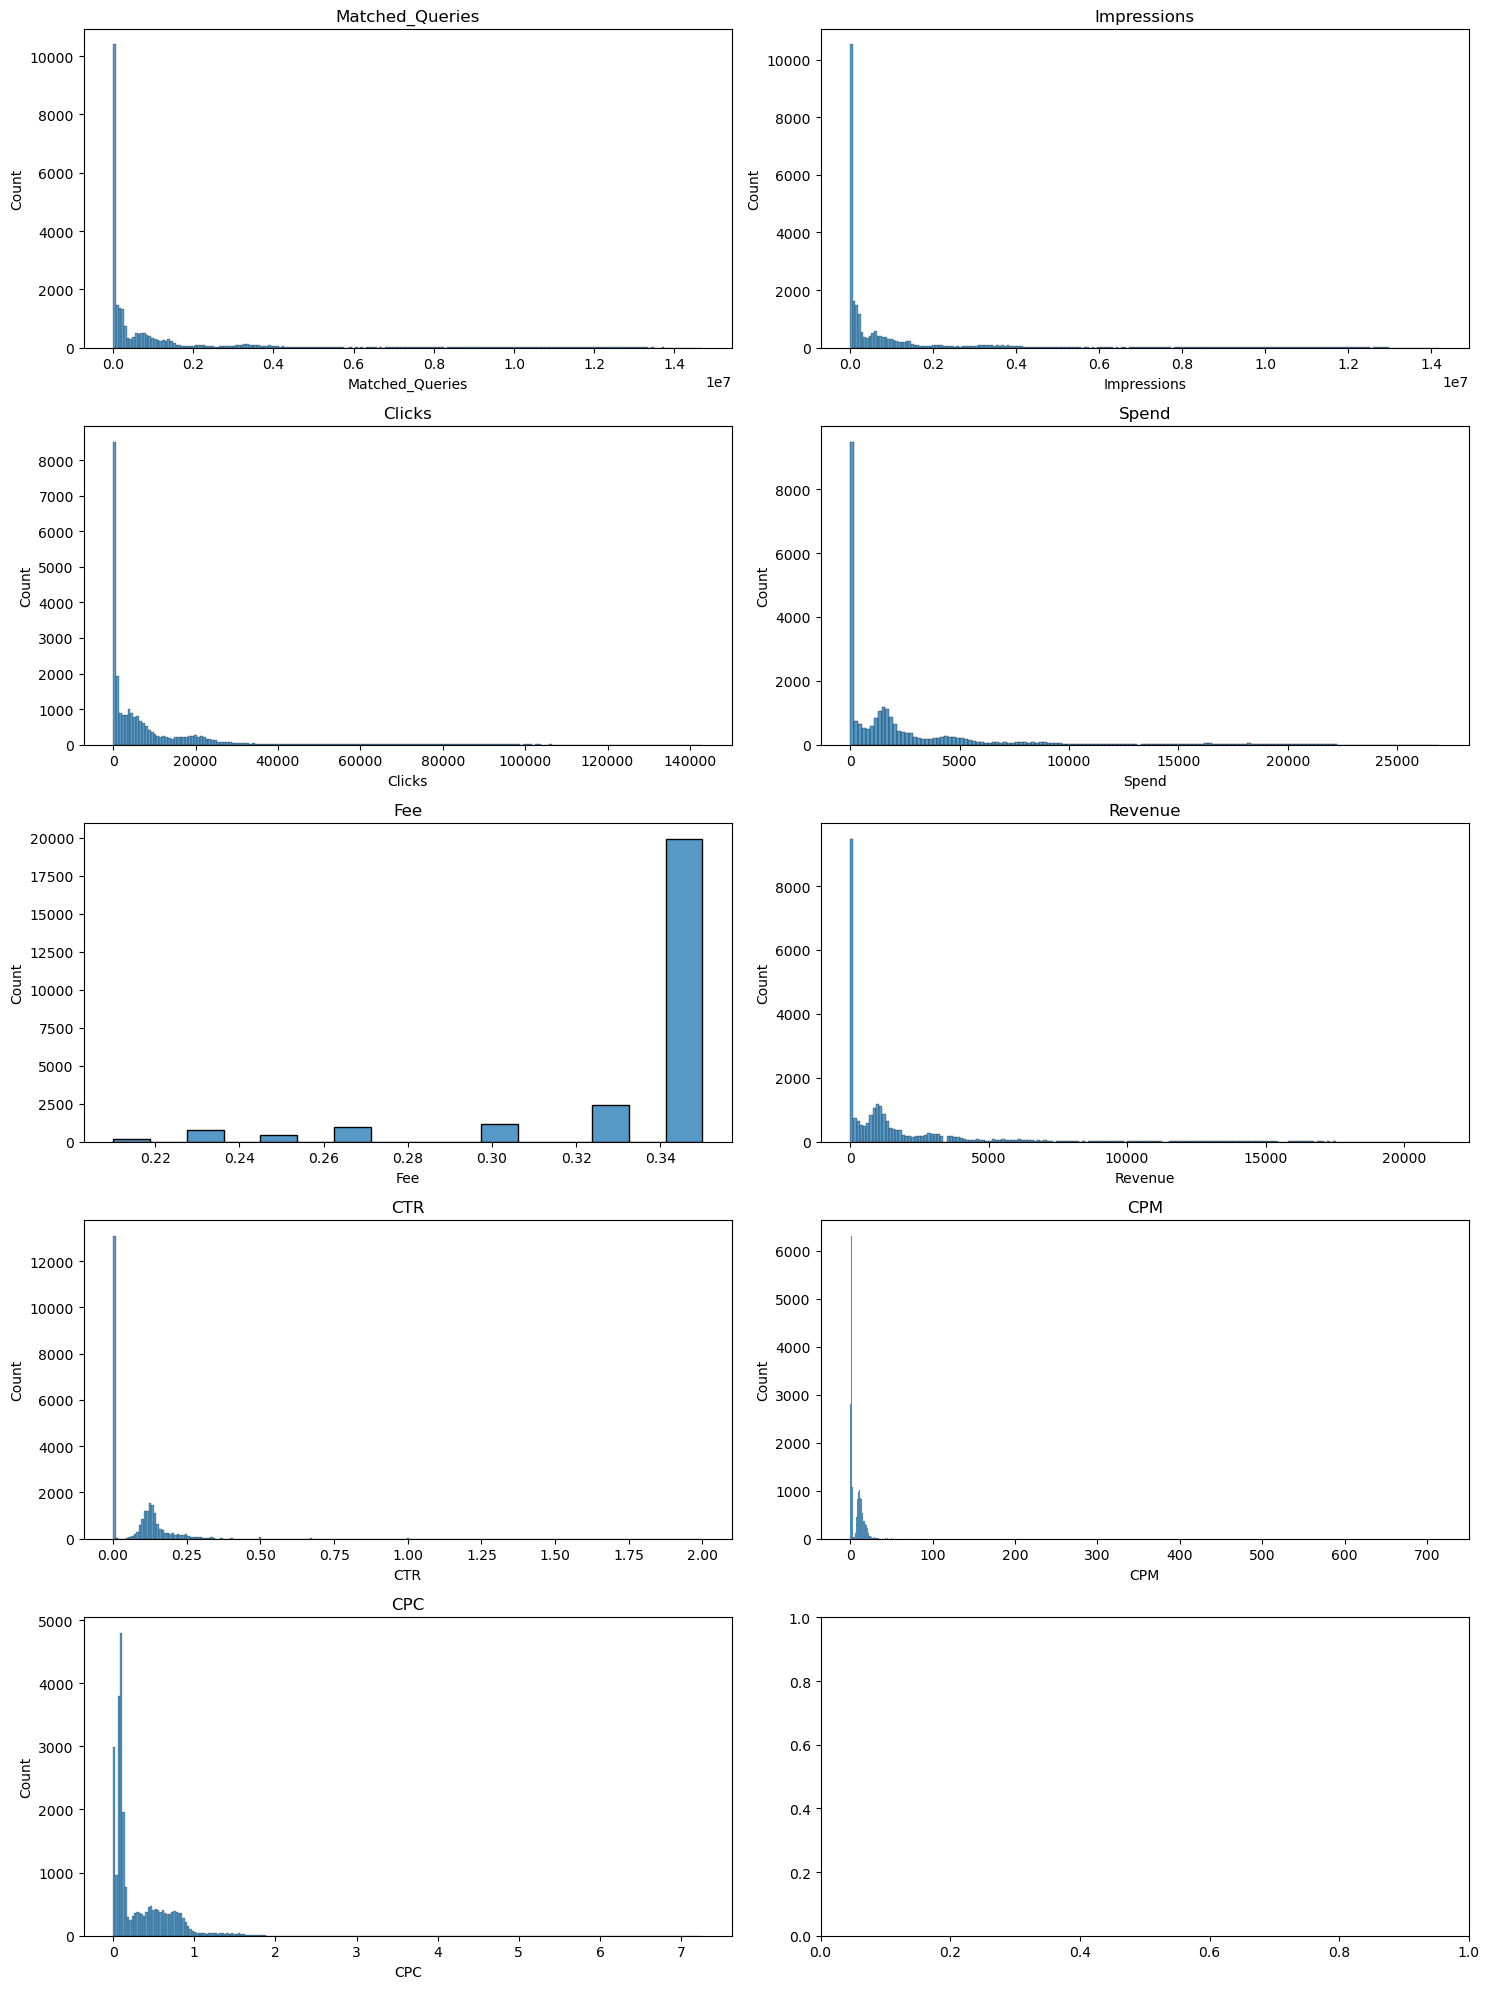

In [46]:
#visualizando distribuição das variáveis quantitativas - Histogram

colunas_numericas = df_1_quantitative.columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.histplot(x=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()

Standardization/Z-score

In [47]:
cols = list(df_1_quantitative.columns)
cols

['Matched_Queries',
 'Impressions',
 'Clicks',
 'Spend',
 'Fee',
 'Revenue',
 'CTR',
 'CPM',
 'CPC']

In [48]:
df_1_quantitative[cols] = df_1_quantitative[cols].apply(zscore)
df_1_quantitative

,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.479805,-0.475883,-0.569683,-0.613939,0.434559,-0.573527,-0.821825,-0.842817,-0.886441
1,-0.479810,-0.475888,-0.569683,-0.613939,0.434559,-0.573527,-0.821825,-0.842817,-0.886441
2,-0.479764,-0.475843,-0.569683,-0.613939,0.434559,-0.573527,-0.821825,-0.842817,-0.886441
3,-0.479801,-0.475880,-0.569683,-0.613939,0.434559,-0.573527,-0.821825,-0.842817,-0.886441
4,-0.479797,-0.475874,-0.569624,-0.613939,0.434559,-0.573527,-0.790967,-0.842817,-0.886441
...,...,...,...,...,...,...,...,...,...
25852,0.432760,0.415241,-0.420114,0.357941,-0.220338,0.282096,-0.808613,-0.636362,3.624194
25853,0.561264,0.543183,-0.368145,0.695699,-1.202682,0.631077,-0.806257,-0.599536,3.624426
25854,0.150683,0.134284,-0.480097,0.009568,0.434559,-0.040991,-0.810268,-0.649393,3.944901
25855,0.099733,0.087484,-0.476150,0.042656,0.434559,-0.012730,-0.808757,-0.622212,3.986595


"""3 - means that 99.7% of the data is saved 2 - means that 95.44% of the data is saved 1 - means that 68.26% of the data is saved"""

In [49]:
outliers_threshold = 1

selected_dada = df_1_quantitative[cols].abs() <= outliers_threshold

not_selected_dada = ~(selected_dada)

In [50]:
selected_dada

,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
25852,True,True,True,True,True,True,True,True,False
25853,True,True,True,True,False,True,True,True,False
25854,True,True,True,True,True,True,True,True,False
25855,True,True,True,True,True,True,True,True,False


In [51]:
not_selected_dada

,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
25852,False,False,False,False,False,False,False,False,True
25853,False,False,False,False,True,False,False,False,True
25854,False,False,False,False,False,False,False,False,True
25855,False,False,False,False,False,False,False,False,True


In [52]:
mask = (selected_dada).all(axis=1)
mask

0         True
1         True
2         True
3         True
4         True
         ...  
25852    False
25853    False
25854    False
25855    False
25856    False
Length: 25857, dtype: bool

In [53]:

df_1 = df_1[mask]

In [54]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14427 entries, 0 to 25796
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   14427 non-null  datetime64[ns]
 1   Hour_of_Day            14427 non-null  int64         
 2   Date_1                 14427 non-null  object        
 3   AD_Size                14427 non-null  object        
 4   Platform               14427 non-null  object        
 5   Device_Type            14427 non-null  object        
 6   Format                 14427 non-null  object        
 7   Available_Impressions  14427 non-null  int64         
 8   Matched_Queries        14427 non-null  int64         
 9   Impressions            14427 non-null  int64         
 10  Clicks                 14427 non-null  int64         
 11  Spend                  14427 non-null  float64       
 12  Fee                    14427 non-null  float64       
 13  Revenu

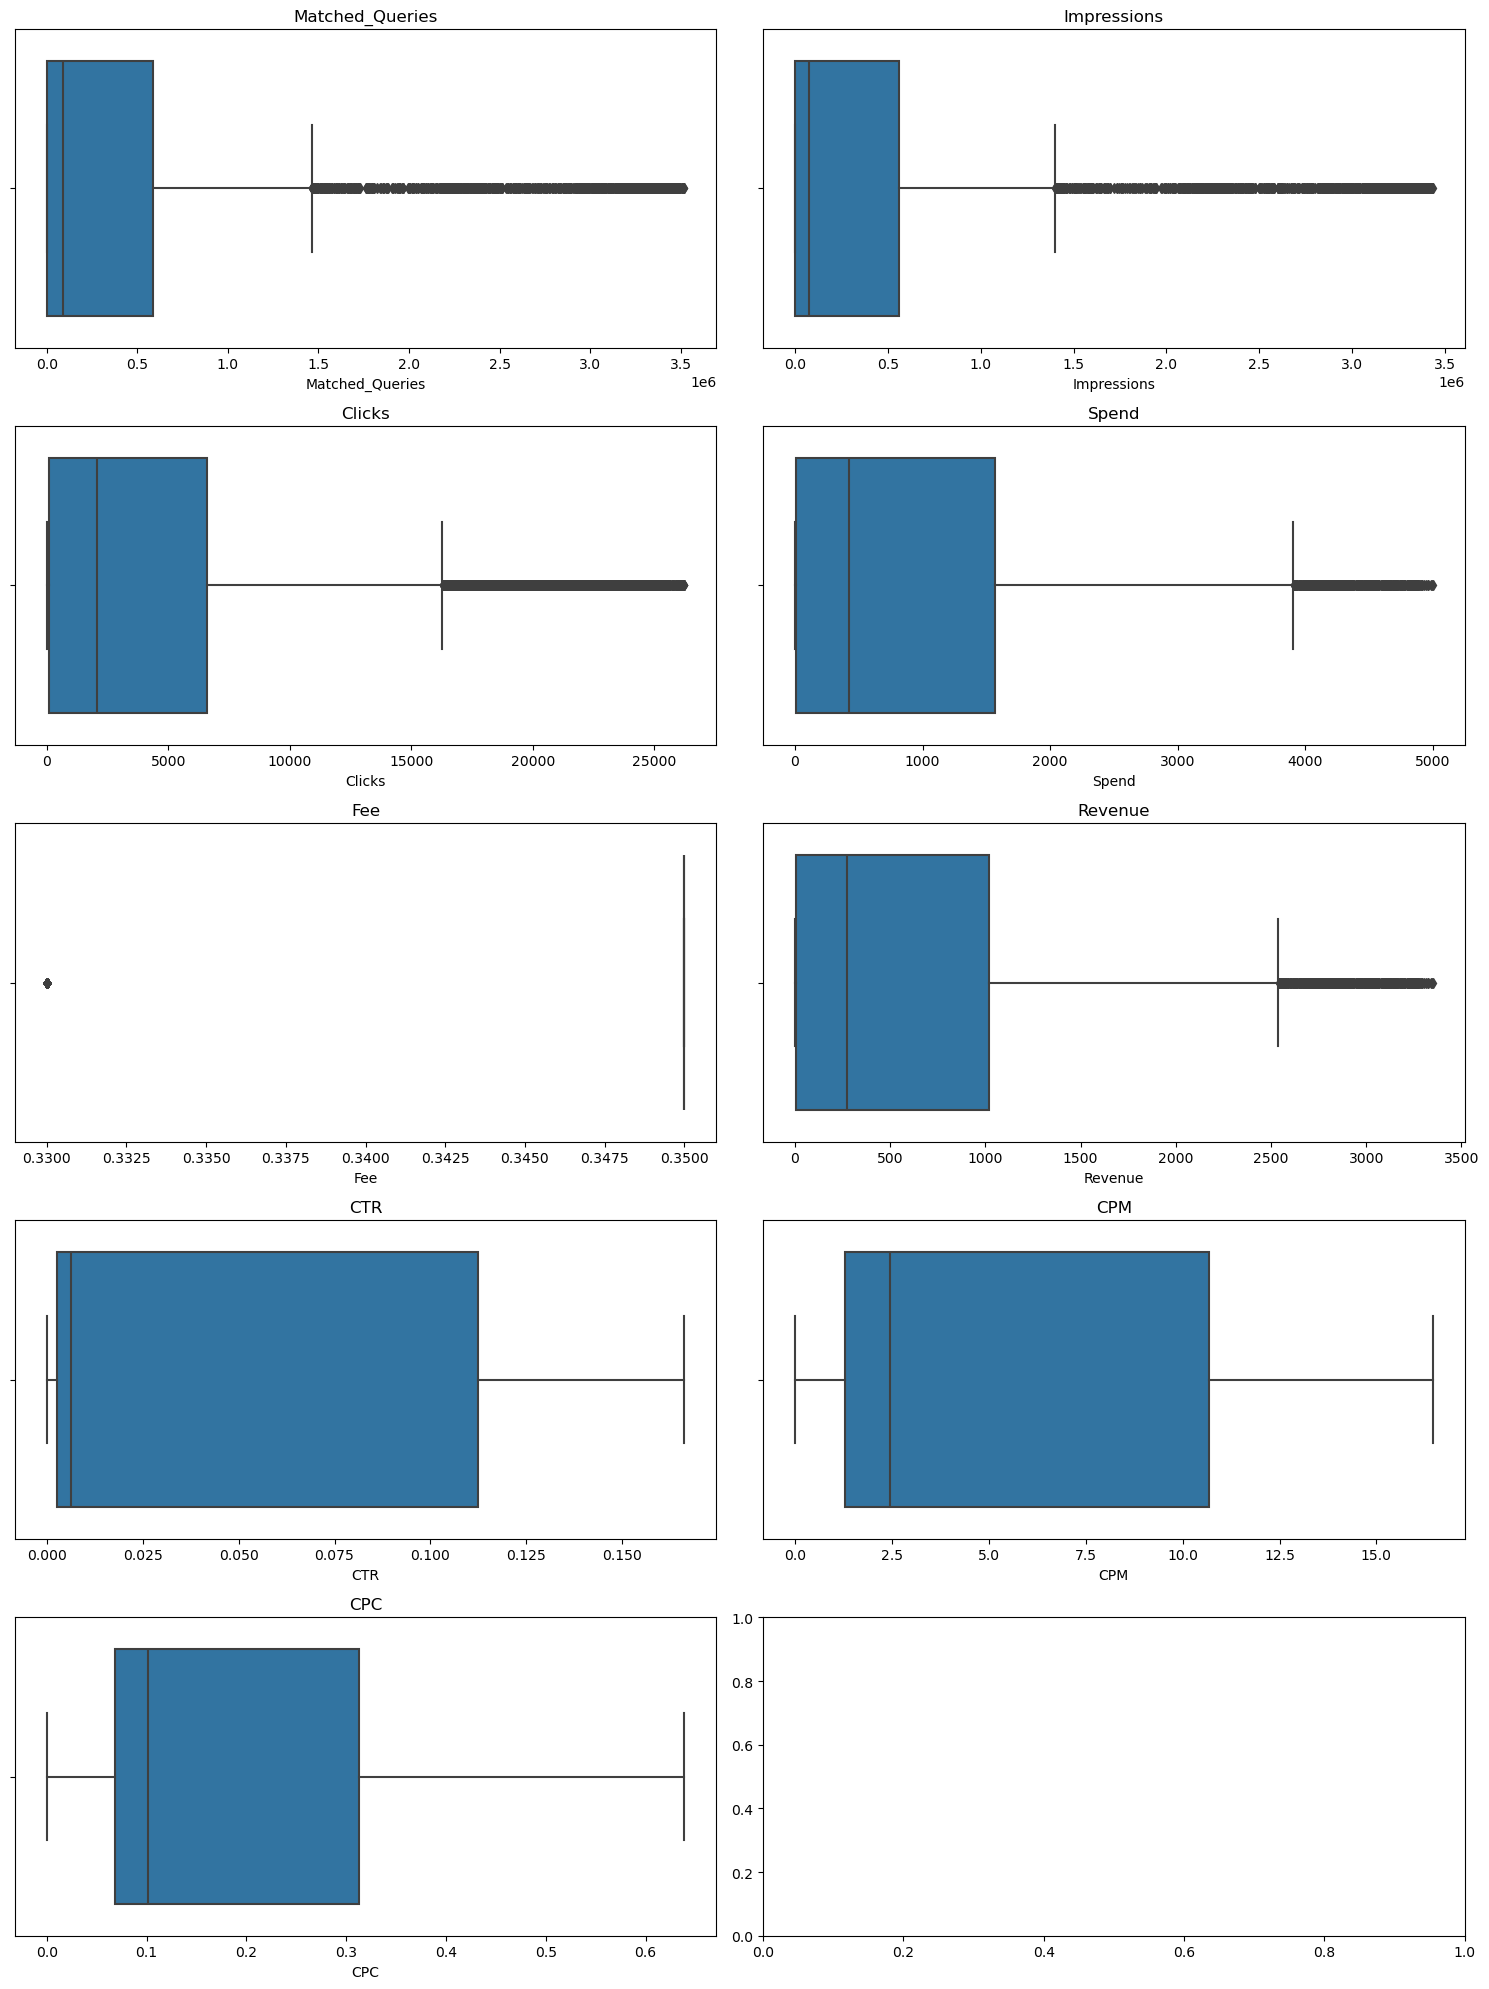

In [55]:
#visualizando distribuição das variáveis quantitativas - boxplot

colunas_numericas = df_1_quantitative.columns

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for n, variaveis in enumerate(colunas_numericas):
    sns.boxplot(x=df_1[variaveis], ax=axes[n//2, n%2])
    axes[n//2, n%2].set_title(variaveis)

plt.tight_layout()
plt.show()

Collinearity

In [56]:
# Pearson correlation coefficient
# The range for a correlation coefficient is between -1 and 1
# Typically, we say that two variables are correlated if 
# their correlation coefficient is greater than 0.5, or less than -0.5.
corr = df_1_quantitative.corr()
print("Correlation Coefficients")
print(corr)

Correlation Coefficients
                 Matched_Queries  Impressions    Clicks     Spend       Fee  \
Matched_Queries         1.000000     0.999923  0.148156  0.907085 -0.836788   
Impressions             0.999923     1.000000  0.140671  0.903802 -0.833011   
Clicks                  0.148156     0.140671  1.000000  0.503536 -0.548315   
Spend                   0.907085     0.903802  0.503536  1.000000 -0.958332   
Fee                    -0.836788    -0.833011 -0.548315 -0.958332  1.000000   
Revenue                 0.910780     0.907467  0.486277  0.998716 -0.960198   
CTR                    -0.344406    -0.346359  0.152415 -0.232519  0.164888   
CPM                    -0.282851    -0.284966  0.174041 -0.154447  0.098265   
CPC                     0.594544     0.595896 -0.078812  0.513727 -0.425574   

                  Revenue       CTR       CPM       CPC  
Matched_Queries  0.910780 -0.344406 -0.282851  0.594544  
Impressions      0.907467 -0.346359 -0.284966  0.595896  
Clicks    

In [57]:
# Spearman's Rank correlation coefficient
# Measures the monotonic relation between a pair of variables
# their correlation coefficient is greater than 0.5, or less than -0.5.

corr = df_1_quantitative.corr(method="spearman")
print(corr)

                 Matched_Queries  Impressions    Clicks     Spend       Fee  \
Matched_Queries         1.000000     0.999284  0.724439  0.925869 -0.640357   
Impressions             0.999284     1.000000  0.719501  0.922549 -0.635019   
Clicks                  0.724439     0.719501  1.000000  0.883490 -0.552269   
Spend                   0.925869     0.922549  0.883490  1.000000 -0.735910   
Fee                    -0.640357    -0.635019 -0.552269 -0.735910  1.000000   
Revenue                 0.925869     0.922549  0.883490  1.000000 -0.735910   
CTR                    -0.291838    -0.293699  0.202519 -0.081864  0.219793   
CPM                    -0.263775    -0.268312  0.201412 -0.013018  0.134293   
CPC                     0.823880     0.825765  0.386756  0.699296 -0.461942   

                  Revenue       CTR       CPM       CPC  
Matched_Queries  0.925869 -0.291838 -0.263775  0.823880  
Impressions      0.922549 -0.293699 -0.268312  0.825765  
Clicks           0.883490  0.202519